In [5]:
%load_ext tensorboard

import numpy as np 
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import  mnist
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard


import tensorflow as tf
import datetime


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [6]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
print(X_test)

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


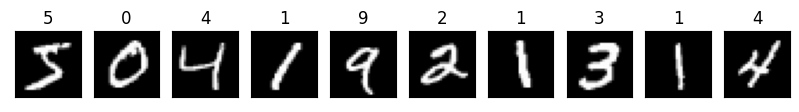

In [7]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [8]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

print(y_train.shape)
print(y_test.shape)


(60000, 10)
(10000, 10)


In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 40480 (158.12 KB)
Trainable params: 40480 

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [31]:
checkpoint  = ModelCheckpoint(filepath='my_best_model.epoch_01-loss_13.31.hdf5' ,monitor='val_loss', verbose=1,save_best_only=True,mode='min')
checkpoint2 = TensorBoard(log_dir='./logs')
callback = [checkpoint,checkpoint2]
model.fit(X_train,
           y_train,
            epochs=10, 
          validation_data=(X_test,y_test),
          callbacks=callback
          )

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.4502 - acc: 0.8671
Epoch 1: val_loss improved from inf to 0.31311, saving model to my_best_model.epoch_01-loss_13.31.hdf5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4502 - acc: 0.8671 - val_loss: 0.3131 - val_acc: 0.9064
Epoch 2/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.4623 - acc: 0.8641
Epoch 2: val_loss improved from 0.31311 to 0.26252, saving model to my_best_model.epoch_01-loss_13.31.hdf5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4614 - acc: 0.8644 - val_loss: 0.2625 - val_acc: 0.9178
Epoch 3/10
1857/1875 [============================>.] - ETA: 0s - loss: 0.4316 - acc: 0.8730
Epoch 3: val_loss did not improve from 0.26252
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4319 - acc: 0.8728 - val_loss: 0.2805 - val_acc: 0.9154
Epoch 4/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.4278 - acc: 0.8743
Ep

In [19]:
import cv2 

# read the image file 
file ='./test.png'
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE) 


imag = cv2.resize(img,(28,28),interpolation=cv2.INTER_LINEAR)

imag = imag.astype('float32')

imag = imag.reshape (1,28,28,1)
imag = 255-imag
imag /= 255

In [36]:

predictions = model.predict(imag)
print(predictions)

1/1 [==============================] - 0s 90ms/step
[[0.00350934 0.06689809 0.11576775 0.39443347 0.03521086 0.31863073
  0.01553205 0.00271508 0.04392209 0.00338056]]


In [37]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[3]


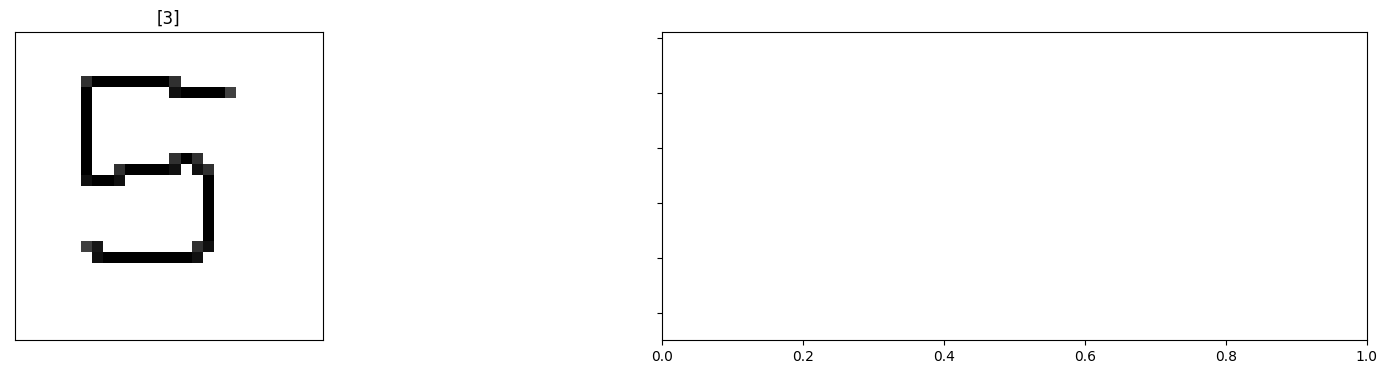

In [35]:
fig, axes = plt.subplots(ncols=2, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(1):
    axes[i].set_title(predictions)
    axes[i].imshow(img, cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()